In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [29]:
dataset=pd.read_csv('G:\Dataset\\50_Startups.csv')
dataset.head(5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]


In [31]:
states=pd.get_dummies(X['State'],drop_first=True)

In [32]:
X=X.drop('State',axis=1)

# concat the dummy variables
X=pd.concat([X,states],axis=1)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [35]:

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [36]:
print(y_pred)

[103015.20159796 132582.27760816 132447.73845174  71976.09851258
 178537.48221055 116161.24230165  67851.69209676  98791.73374687
 113969.43533012 167921.0656955 ]


In [24]:
print(score)

0.9347068473282423


In [42]:
df1=pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})
df1.head(5)

,predictions,actual
28,103015.201598,103282.38
11,132582.277608,144259.40
10,132447.738452,146121.95
41,71976.098513,77798.83
2,178537.482211,191050.39


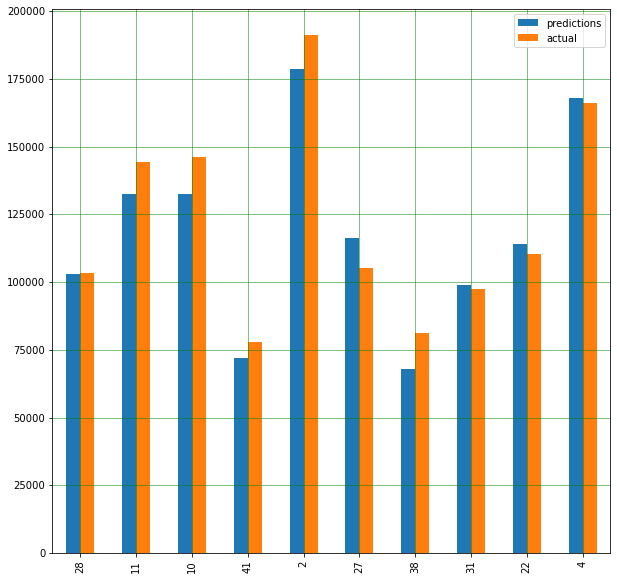

In [40]:
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()